In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# where id and host_id are two unique identifiable attributes not needed .
# last review is a date where it is not needed because if they don't give a review date will not be there.
df.drop(['id','last_review'],axis=1,inplace=True)

In [ ]:
# Name of the property is not mentioned, review per month missing values are handled by adding 0.0
df['name'].fillna('Not Mentioned',axis=0,inplace=True)
df['host_name'].fillna('Not Mentioned',axis=0,inplace=True)
df['reviews_per_month'].fillna(0.0,axis=0,inplace=True)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# Descriptive Statistics
num = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
df[num].describe(include=[int,float])

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#The average price of a house or a apartment is 152 $ , Where the minimum night stays  avg a week.Where the host_listings_count from a person is avg of 7 , This indicates that where one property is can be listed for 7 times for the reach or really 7 different property ( Rental Business ) are hosted.

In [ ]:
area=df['neighbourhood_group'].value_counts()
area

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Text(0, 0.5, 'No of Listings')

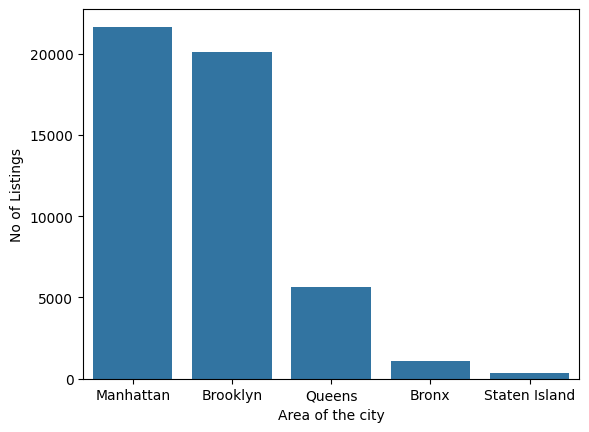

In [ ]:
sns.barplot(x=area.index,y=area.values)
plt.xlabel('Area of the city')
plt.ylabel('No of Listings')

In [ ]:
df_area=pd.DataFrame(index=['mean','std','min','25%','50%','75%','max'])

In [ ]:
for area in df['neighbourhood_group'].unique():
  df_area.loc['mean',area]=df[df['neighbourhood_group']==area]['price'].mean().round()
  df_area.loc['std',area]=df[df['neighbourhood_group']==area]['price'].std().round()
  df_area.loc['min',area]=df[df['neighbourhood_group']==area]['price'].min().round()
  df_area.loc['25%',area]=np.percentile(df[df['neighbourhood_group']==area]['price'],25).round()
  df_area.loc['50%',area]=np.percentile(df[df['neighbourhood_group']==area]['price'],50).round()
  df_area.loc['75%',area]=np.percentile(df[df['neighbourhood_group']==area]['price'],75).round()
  df_area.loc['max',area]=df[df['neighbourhood_group']==area]['price'].max().round()

In [ ]:
df_area

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
mean,124.0,197.0,100.0,115.0,87.0
std,187.0,291.0,167.0,278.0,107.0
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


<Axes: xlabel='neighbourhood_group', ylabel='price'>

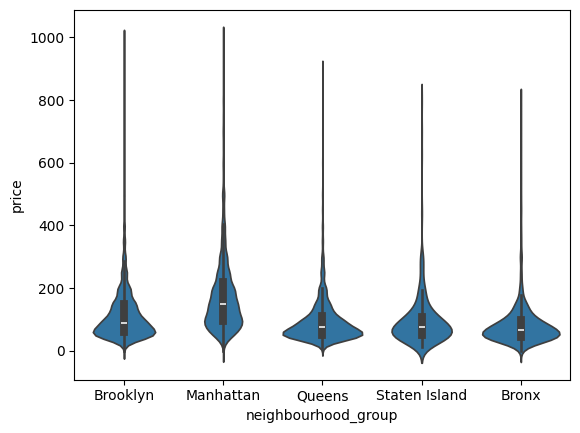

In [ ]:
df_sub=df[df['price']<1000]
sns.violinplot(data=df_sub,x='neighbourhood_group',y='price')

#From the above stats and plot we can determine that manhattan area is expensive where the avg price of property listings is 197 dollars ,Secondly brooklyn avg price of 124 dollars followed by Staten Island 115 dollars and Queens area of avg price 100 dollars and where the property listing are cheap and low at Bronx of avg price 87 dollars.

In [ ]:
# where the one person can put more listings of properties , We cannot determine by name because different persons
# has same name.
df['host_name'].value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11453, dtype: int64

In [ ]:
df['host_name'][:5]

0           John
1       Jennifer
2      Elisabeth
3    LisaRoxanne
4          Laura
Name: host_name, dtype: object

<Axes: xlabel='calculated_host_listings_count', ylabel='host_name'>

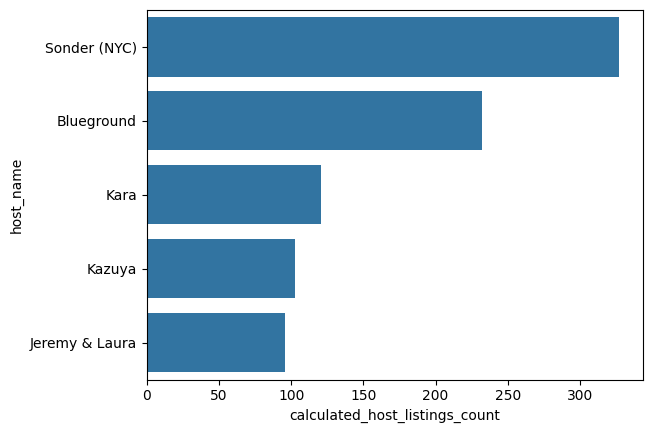

In [ ]:
df_sub=df[['host_id','host_name','calculated_host_listings_count']].drop_duplicates()
df_sub=df_sub.sort_values('calculated_host_listings_count',ascending=False)
sns.barplot(y=df_sub['host_name'][:5],x=df_sub['calculated_host_listings_count'][:5],orient='h')

# where Sonder (host_name) who have been listed lot of properties - 327 properties ( rental business )

<Axes: xlabel='room_type', ylabel='count'>

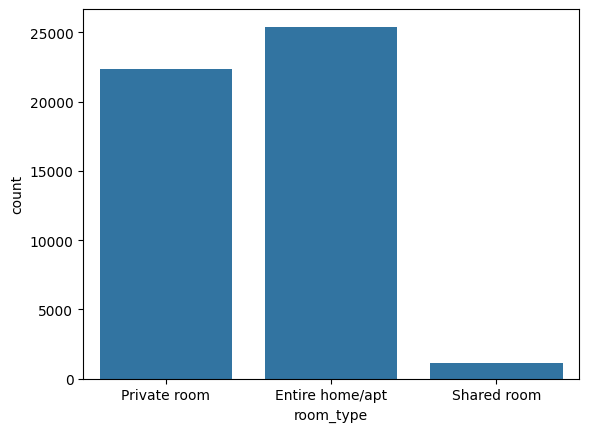

In [ ]:
# Room_Type Availability

sns.countplot(data=df,x='room_type')

In [ ]:
df[['room_type','price']].groupby(['room_type']).mean('price').reset_index().round()

,room_type,price
0,Entire home/apt,212.0
1,Private room,90.0
2,Shared room,70.0


# Where if you see that Entire home/apt avg price is higher than private room and shared room.

In [ ]:
pd.DataFrame(df[['host_id','neighbourhood_group','room_type']].groupby(['neighbourhood_group','room_type']).size()).reset_index()

,neighbourhood_group,room_type,0
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


# Where the Manhattan area of NYC offerings or listings more on Entire home/apt type of property ( 13999 listings )

# Brooklyn area offering or listings more on private room type of property     ( 10132 listings )

# Again Manhattan area of NYC offerings or listings more on shared room type of property ( 480 listings )

In [ ]:
pd.DataFrame(df[['neighbourhood_group','room_type','price']].groupby(['neighbourhood_group','room_type']).mean('price')).reset_index().round()


,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,128.0
1,Bronx,Private room,67.0
2,Bronx,Shared room,60.0
3,Brooklyn,Entire home/apt,178.0
4,Brooklyn,Private room,77.0
5,Brooklyn,Shared room,51.0
6,Manhattan,Entire home/apt,249.0
7,Manhattan,Private room,117.0
8,Manhattan,Shared room,89.0
9,Queens,Entire home/apt,147.0


### Avg price on each room type on different area of NYC .

In [ ]:
# number of reviews
df[['name','host_name','neighbourhood_group','room_type','price','number_of_reviews','availability_365']].sort_values('number_of_reviews',ascending=False).head()

,name,host_name,neighbourhood_group,room_type,price,number_of_reviews,availability_365
11759,Room near JFK Queen Bed,Dona,Queens,Private room,47,629,333
2031,Great Bedroom in Manhattan,Jj,Manhattan,Private room,49,607,293
2030,Beautiful Bedroom in Manhattan,Jj,Manhattan,Private room,49,597,342
2015,Private Bedroom in Manhattan,Jj,Manhattan,Private room,49,594,339
13495,Room Near JFK Twin Beds,Dona,Queens,Private room,47,576,173


### Having more reviews, especially positive ones, attracts new customers which, in turn, leads  to customer satisfaction and helps the business grow.

In [ ]:
#reviews_per_month
df[['name','host_name','neighbourhood_group','room_type','price','reviews_per_month','availability_365']].sort_values('reviews_per_month',ascending=False).head()

,name,host_name,neighbourhood_group,room_type,price,reviews_per_month,availability_365
42075,Enjoy great views of the City in our Deluxe Room!,Row NYC,Manhattan,Private room,100,58.50,299
42076,Great Room in the heart of Times Square!,Row NYC,Manhattan,Private room,199,27.95,299
38870,Lou's Palace-So much for so little,Louann,Queens,Private room,45,20.94,134
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,Nalicia,Queens,Private room,80,19.75,26
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,Nalicia,Queens,Private room,50,17.82,25


### A higher value for reviews_per_month generally suggests that a property is frequently booked.